<a href="https://colab.research.google.com/github/axrd/DS-Sprint-01-Dealing-With-Data/blob/master/module3-basicdatavisualizations/LS_DS_113_Plotting_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

In [0]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

In [0]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [26]:
################################################ STARTING MY PROJECT #################################################################################
!pip install xlrd



    100% |████████████████████████████████| 112kB 3.1MB/s 


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Using Demographic data for NYC
df_1 = pd.read_csv('https://data.cityofnewyork.us/api/views/kku6-nxdu/rows.csv')
total_participants = df_1['COUNT PARTICIPANTS'].sum()
male = df_1['COUNT MALE'].sum()
female = df_1['COUNT FEMALE'].sum()


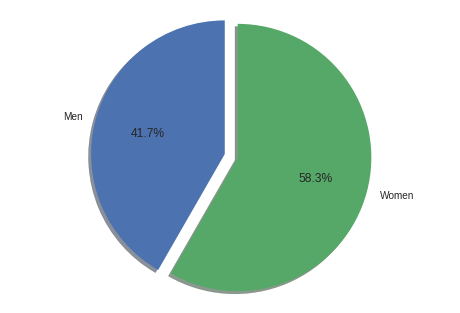

In [3]:
labels = 'Men', 'Women'
sizes = [(male/total_participants), (female/total_participants)]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

There's a decent spread between the amount of men and women in NYC. There's aproximately 16% more women as of the latest census data. 

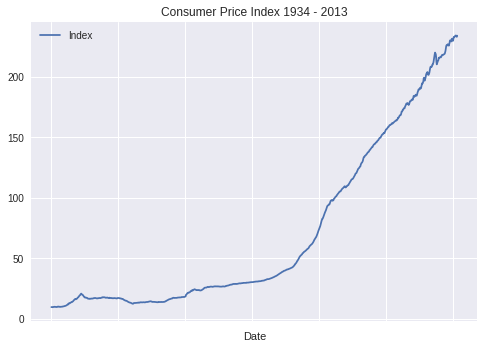

In [4]:
### Next up is: 

df_2 = pd.read_csv('https://datahub.io/core/cpi-us/r/cpiai.csv')
df_2.head()

df_2.plot(kind='line', x = 'Date', y = 'Index', title = 'Consumer Price Index 1934 - 2013', legend=True);

Such a powerful relationship. Things have gotten pretty expensive in the last 79 years. For a more complete picture we'd need to factor in the collapsing costs of goods due to technology. Purchasing power would be a good start. 

In [64]:
# Now we're looking as median household income in Oklahoma 2010 - 2014:

import matplotlib.pyplot as plt

df_3 = pd.read_csv('https://data.ok.gov/sites/default/files/res_median_household_income_93ry-4338.csv')
df_3.head()

# Taking out Dollar $ign
df_3.replace({'$': ''}, regex=True)

df_3.head()

#Dropping rows with NaNs
#df_3_noNan = df_3[:5]
#df_3_noNan = df_3_noNan.drop('Target', axis=1)
#df_3_noNan.head()

#df_3_noNan.plot(x = df_3_noNan['Years'], y = df_3_noNan['Historical Data'], kind='bar');






,Years,Historical Data,Target
0,2009,$41664.00,NaN
1,2010,$42072.00,NaN
2,2011,$43225.00,NaN
3,2012,$44312.00,NaN
4,2013,$45690.00,NaN
